<h1>Exploratory Data Analysis into the files online</h1>

<h1>Summary of Data over the years</h1>

<h2>2009 data:</h2>
'Resources\LUCAS datasets\LUCAS 2009\LUCAS_21681_points\NoSensitive.csv'

Columns:
POINT_ID|"sample_ID"|"X_LAEA"|"Y_LAEA"|"coarse"|"clay"|"silt"|"sand"|"pH_in_H2O"|"pH_in_CaCl"|"OC"|"CaCO3"|"N"|"P_x"|"K"|"CEC"|"Notes"|"GPS_LAT"|"GPS_LONG"|"X"|"Country"|"PTotal"|"Corine_LU"|"coords_x1"|"coords_x2"|"SURV_DATE"|"LC1"|"LC-parent"|"LC-Group"|"LC2"|"OBS_RADIUS"|"LU1"|"LU2"|"LC1_SPECIE"|"LC1_PERCEN"|"LC2_SPECIE"|"LC2_PERCEN"|"AREA_SIZE"|"TREES_HEIG"|"FEATURES_W"|"LAND_MNGT"|"WM_WATER_M"|"WM_SRC_IRR"|"WM_TYP_IRR"|"WM_DELIVER"|"SOIL_SURVE"|"SOIL_PLOUG"|"SOIL_CROP"|"SOIL_STONE"|"STRATA"|"STRATA2"|"nuts3"|"nuts0"|"area0"|"nuts1"|"area1"|"nuts2"|"area2"|"area3"|"Transect"|"CLIMANR"|"MAIN_CLIMA"|"LC"|"lc_GROUP"|"WRB_COD"|"AnnualPrec"|"WRB_LV1"|"ParMat1"|"ParMat2"|"Elevation(m)"|"slope (Degrees)"|"LONG"|"LAT"|"geom_X"|"geom_Y"
21,681 Rows

Total Phosphorous (PTotal)
'Resources\LUCAS datasets\LUCAS 2009\PTotal_points\PTotal2009.csv'

Columns:
POINT_ID|"PTotal"|"Country"|"LONG"|"LAT"|"geom_X"|"geom_Y"
21,859 Rows

<u>_(1) Compare a list of Point IDs (join / merge) in csv file. Combine PTotal for points that have PTotal into the NoSensitive.csv data_</u>

<u>_(2) Compare a list of Point IDs (join / merge) in shp file. Plot (1) into map_</u>

Note: We should look at comparing all the PointID and label by year from each file as "there are 21,859 points, of which 4,246 are at new locations when compared with the 2009/2012 campaigns" i.e. the 21,859 PointIDs in 2009 file may be referring to a different location in the 2015 and onwards file. #Before# joining the data from each year into the data. Thereafter, assigning new PointIDs to these 4,246 locations. "Revisited_point" in 2015 helps to identify these points.

<h2>2015 data</h2>
'Resources\LUCAS datasets\LUCAS 2015\LUCAS2015_topsoildata_20200323\LUCAS_Topsoil_2015_20200323.csv'

Columns:
Point_ID	Revisited_point	Coarse	Clay	Sand	Silt	pH(CaCl2)	pH(H2O)	EC	OC	CaCO3	P	N	K	Elevation	LC1	LU1	Soil_Stones	NUTS_0	NUTS_1	NUTS_2	NUTS_3	LC1_Desc	LU1_Desc
21,859 points

<h2>2018 data</h2>
'Resources\LUCAS datasets\LUCAS 2018\LUCAS-SOIL-2018-data-report-readme-v2\LUCAS-SOIL-2018-v2\LUCAS-SOIL-2018.csv'

Columns:
Depth	POINTID	pH_CaCl2	pH_H2O	EC	OC	CaCO3	P	N	K	OC (20-30 cm)	CaCO3 (20-30 cm)	Ox_Al	Ox_Fe	NUTS_0	NUTS_1	NUTS_2	NUTS_3	TH_LAT	TH_LONG	SURVEY_DATE	Elev	LC	LU	LC0_Desc	LC1_Desc	LU1_Desc


<h2>Test / Indications of Soil Erosion / Soil Health</h2>

Bulk Density of soil at each depth:
'Resources\LUCAS datasets\LUCAS 2018\LUCAS-SOIL-2018-data-report-readme-v2\LUCAS-SOIL-2018-v2\BulkDensity_2018_final-2.csv'

Level of soil erosion:
'Resources\LUCAS datasets\LUCAS 2018\LUCAS-SOIL-2018-data-report-readme-v2\LUCAS-SOIL-2018-v2\LUCAS2018_EROSION.csv'

Conditions of Organic Soil (vs other soil being eroded over):
'Resources\LUCAS datasets\LUCAS 2018\LUCAS-SOIL-2018-data-report-readme-v2\LUCAS-SOIL-2018-v2\LUCAS2018_ORG.csv'

Will need to understand the report methodology to determine what scenario these three data sets are meant to illustrate



In [7]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import asyncio

In [17]:
# filepaths
lucas_2009_soil_shp_path = "Resources\LUCAS datasets\LUCAS 2009\LUCAS_21681_points\LUCAS_Points.shp"
lucas_2009_PTotal_path = "Resources\LUCAS datasets\LUCAS 2009\PTotal_points\PTotal2009.shp"
lucas_2015_soil_shp_path = "Resources\LUCAS datasets\LUCAS 2015\LUCAS2015_topsoildata_20200323\LUCAS_Topsoil_2015_20200323-shapefile\LUCAS_Topsoil_2015_20200323.shp"
lucas_2018_soil_shp_path = "Resources\LUCAS datasets\LUCAS 2018\LUCAS-SOIL-2018-data-report-readme-v2\LUCAS-SOIL-2018-v2\LUCAS-SOIL-2018 .shp"

lucas_2009_soil_data_path = "Resources\LUCAS datasets\LUCAS 2009\LUCAS_21681_points\LUCAS_2009_Soil.csv"
lucas_2009_PTotal_data_path = "Resources\LUCAS datasets\LUCAS 2009\PTotal_points\PTotal2009.csv"
lucas_2015_soil_data_path = "Resources\LUCAS datasets\LUCAS 2015\LUCAS2015_topsoildata_20200323\LUCAS_Topsoil_2015_20200323.csv"
lucas_2018_soil_data_path = "Resources\LUCAS datasets\LUCAS 2018\LUCAS-SOIL-2018-data-report-readme-v2\LUCAS-SOIL-2018-v2\LUCAS-SOIL-2018.csv"

lucas_erosion_data_path = "Resources\LUCAS datasets\LUCAS 2018\LUCAS-SOIL-2018-data-report-readme-v2\LUCAS-SOIL-2018-v2\LUCAS2018_EROSION.csv"
lucas_bulkdensity_data_path = "Resources\LUCAS datasets\LUCAS 2018\LUCAS-SOIL-2018-data-report-readme-v2\LUCAS-SOIL-2018-v2\BulkDensity_2018_final-2.csv"
lucas_organic_data_path = "Resources\LUCAS datasets\LUCAS 2018\LUCAS-SOIL-2018-data-report-readme-v2\LUCAS-SOIL-2018-v2\LUCAS2018_ORG.csv"

In [18]:
# read shp files
lucas_2009_soil_shp = gpd.read_file(lucas_2009_soil_shp_path)
lucas_2009_PTotal_shp = gpd.read_file(lucas_2009_PTotal_path)
lucas_2015_soil_shp = gpd.read_file(lucas_2015_soil_shp_path)
lucas_2018_soil_shp = gpd.read_file(lucas_2018_soil_shp_path)

# read csv files
lucas_2009_soil_data = pd.read_csv(lucas_2009_soil_data_path, delimiter="|")
lucas_2009_PTotal_data = pd.read_csv(lucas_2009_PTotal_data_path, delimiter="|")
lucas_2015_soil_data = pd.read_csv(lucas_2015_soil_data_path, delimiter=",")
lucas_2018_soil_data = pd.read_csv(lucas_2018_soil_data_path, delimiter=",")

lucas_erosion_data = pd.read_csv(lucas_erosion_data_path, delimiter=",")
lucas_bulkdensity_data = pd.read_csv(lucas_bulkdensity_data_path, delimiter=",")
lucas_organic_data = pd.read_csv(lucas_organic_data_path, delimiter=",")

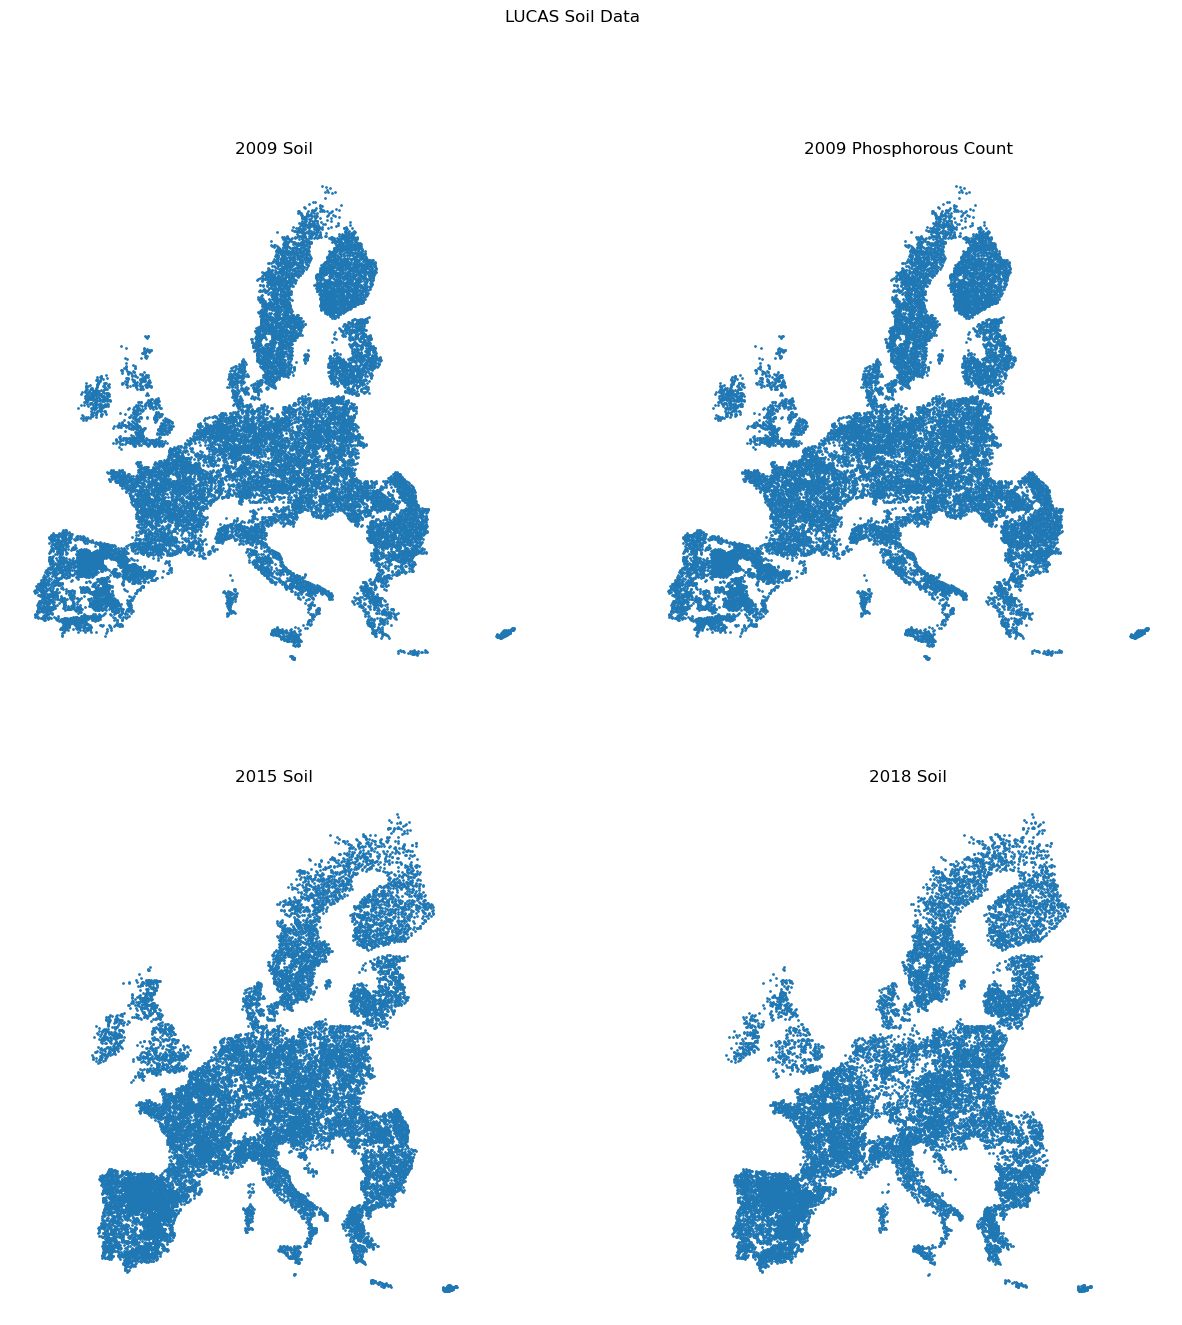

In [42]:
def visualise_maps():
    fig, ax = plt.subplots(2,2, figsize=(15,15))    
    fig.suptitle("LUCAS Soil Data", fontdict={"size":"25"})
    ax[0,0].axis("off")    
    ax[0,0].set_title("2009 Soil")
    lucas_2009_soil_shp.plot(ax=ax[0,0], markersize=1)

    ax[0,1].axis("off")    
    ax[0,1].set_title("2009 Phosphorous Count")
    lucas_2009_PTotal_shp.plot(ax=ax[0,1], markersize=1)
    
    ax[1,0].axis("off")
    ax[1,0].set_title("2015 Soil")
    lucas_2015_soil_shp.plot(ax=ax[1,0], markersize=1)

    ax[1,1].axis("off")
    ax[1,1].set_title("2018 Soil")
    lucas_2018_soil_shp.plot(ax=ax[1,1], markersize=1)

visualise_maps()

In [48]:
def inspect_columns():
    lucas_2015_soil_shp.columns

Index(['Point_ID', 'Coarse', 'Clay', 'Sand', 'Silt', 'pH_CaCl2', 'pH_H20',
       'EC', 'OC', 'CaCO3', 'P', 'N', 'K', 'LC', 'LU', 'NUTS_0', 'NUTS_1',
       'NUTS_2', 'NUTS_3', 'LC0_Desc', 'LC1_Desc', 'LU1_Desc', 'geometry'],
      dtype='object')

In [49]:
lucas_2015_soil_data.columns

Index(['Point_ID', 'Revisited_point', 'Coarse', 'Clay', 'Sand', 'Silt',
       'pH(CaCl2)', 'pH(H2O)', 'EC', 'OC', 'CaCO3', 'P', 'N', 'K', 'Elevation',
       'LC1', 'LU1', 'Soil_Stones', 'NUTS_0', 'NUTS_1', 'NUTS_2', 'NUTS_3',
       'LC1_Desc', 'LU1_Desc'],
      dtype='object')